# Data and Sampling Distributions

In the era of big data, sampling is very useful to understand the population with performance and velocity.

## Random sampling and sample bias

A sample is a subset of the data set (population). An example of a sampling methodology is random sampling, in which each value in the population has the same probability of being selected, and can be done with or without replacement. <br>
Note: Data quality is more important than sample size in reducing bias.

## Imports

In [11]:
import pandas as pd
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import resample

In [2]:
warnings.filterwarnings('ignore')

### Random sampling example with Loan Data

In [3]:
df = pd.read_csv('../../datasets/loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

In [5]:
df_loan_amnt_mean = round(df['loan_amnt'].mean(),2)
df_loan_amnt_mean

14317.28

In [6]:
#Using random_state to reproducibility
sample_df = df.sample(n=384, random_state=42)
sample_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,C5,Licensed vocational nurse,< 1 year,MORTGAGE,65000.0,Verified,Jul-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,950xx,CA,9.32,0.0,Apr-02,0.0,NaN,NaN,7.0,0.0,1208,4.3,20.0,f,0.00,0.00,38213.56000,38213.56,32500.00,5713.56,0.0,0.0,0.0,Oct-15,27391.42,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25100.0,NaN,NaN,NaN
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,E4,shift manager,10+ years,MORTGAGE,60000.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,472xx,IN,24.19,1.0,Aug-03,0.0,3.0,NaN,18.0,0.0,13129,54.7,43.0,w,9214.67,9214.67,4450.12000,4450.12,1785.33,2664.79,0.0,0.0,0.0,Jan-16,297.53,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,107972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,NaN,NaN,NaN
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,C2,FastMed urgent care,1 year,MORTGAGE,175000.0,Verified,Jun-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/06/12 > I am seeking a ...,debt_consolidation,Debt Consolidation,852xx,AZ,13.34,0.0,Mar-02,0.0,41.0,NaN,9.0,0.0,1906,22.4,38.0,f,0.00,0.00,32388.64000,32388.64,30000.00,2388.64,0.0,0.0,0.0,Jan-13,26181.92,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,C4,Registered Nurse,2 years,MORTGAGE,66000.0,Source Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,498xx,MI,17.69,0.0,Aug-08,0.0,NaN,NaN,12.0,0.0,12944,74.4,31.0,w,11901.76,11901.76,4719.18000,4719.18,2498.24,2220.94,0.0,0.0,0.0,Dec-15,338.74,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,139126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17400.0,NaN,NaN,NaN
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,A5,Courier Times,10+ years,MORTGAGE,85000.0,Verified,Feb-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/06/13 > I need to cosol...,debt_consolidation,Consolidate 2013,190xx,PA,8.30,0.0,Oct-86,0.0,39.0,NaN,7.0,0.0,5902,67.8,20.0,f,0.00,0.00,16628.33315,16517.47,15000.00,1628.33,0.0,0.0,0.0,Sep-14,8066.82,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,179532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,NaN,NaN,NaN


In [7]:
sample_df.shape

(384, 75)

In [8]:
sample_loan_amnt_mean = round(sample_df['loan_amnt'].mean(), 2)
sample_loan_amnt_mean

14205.79

In [9]:
abs(round(1-(sample_loan_amnt_mean/df_loan_amnt_mean), 4))

0.0078

## Bias

Bias is an error in sampling or measurement caused by a systematic - not random - error in the sampling process.<br>
To avoid bias in the sampling process, random sampling (with/without replacement/strata) is a useful method. <br>
_NOTE 1: In the era of big data, sampling is very useful, but it is also necessary to analyze whether it is necessary to use all the data._<br>
_NOTE 2: The sample mean is represented by x-bar and the population mean by u._

## Selection Bias

Bias caused by the data selection process that leads to a poor representation of the population.<br>
The target shuffling method is a permutation to test the validity of a data mining result, which in short is testing some hypothesis with different samples.<br>
Some selection bias includes:
* Nonrandom sampling;
* Cherry-picking;
* Selection that accentuate some statistics effect;
* Biased termination of an experimentation;
* Use the data to prove some idea rather that drawing conclusions from the data.

### Regression to the mean


Statistical phenomenon where in successive measurements of a variable, the values tend to be distributed close to the mean, so when extreme values are measured, the next values will most likely be close to the mean - back to the mean.

## Sampling distribution of a statistic

Distribution of a statistical measure based on several samples from a population. 
Ex: Sampling distribution of mean -> Follows a normal distribution based on the population mean and variance^2.
$$
Normal(u, \frac{var^2}{n})
$$

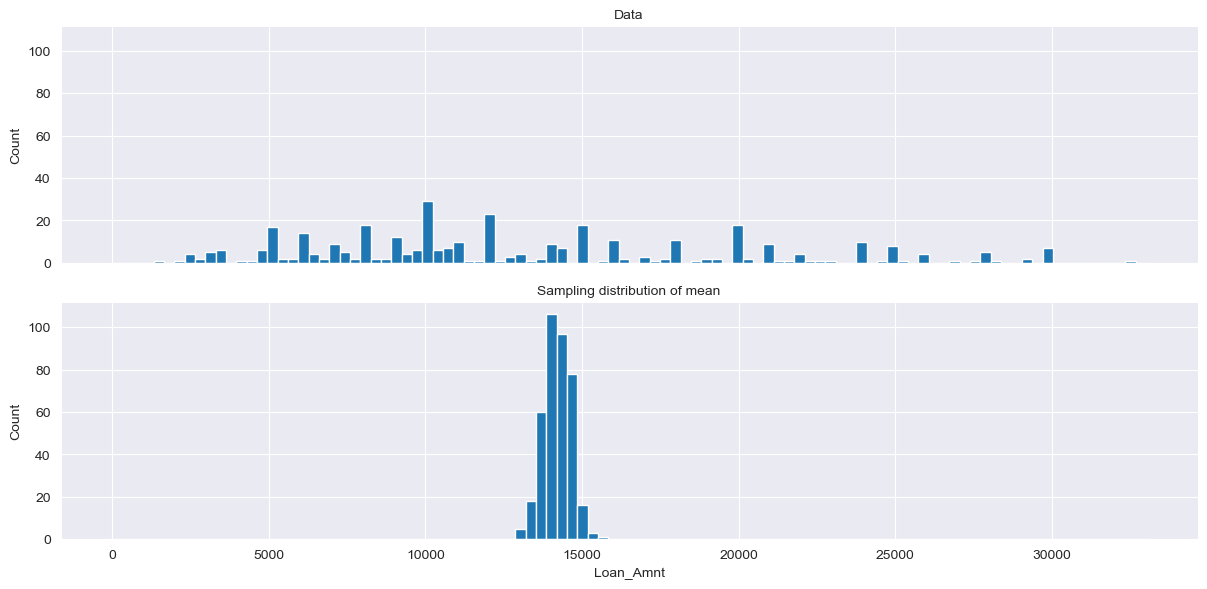

In [10]:
SIZE = 384
S_SIZE = 193
sample_data = pd.DataFrame({
    'loan_amnt': sample_df['loan_amnt'].sample(SIZE),
    'type': 'Data'
})
sample_mean = pd.DataFrame({
    'loan_amnt': [
        sample_data['loan_amnt'].sample(S_SIZE).mean() 
        for _ in range(SIZE)
    ],
    'type': 'Sampling distribution of mean'
})
result = pd.concat([sample_data, sample_mean])
graph = sns.FacetGrid(
    result, col='type', col_wrap=1, height=3, aspect=4
)
graph.map(plt.hist, 'loan_amnt', range=[0,33000], bins=100)
graph.set_axis_labels('Loan_Amnt', 'Count')
graph.set_titles('{col_name}')
plt.show()

### Central limit theorem

This theorem states that when values or a statistical measure are measured with multiple samples or by increasing n, the distribution of this measurement will follow a normal bell-shaped curve (normal distribution) - even if the population does not follow a normal distribution.

### Standard error

The SE is the variation of a sample statistical measure for the same population measure. Where X-bar - SE <= U <= X-bar + SE.<br>
$$
SE = \frac{s}{\sqrt{n}}
$$

## The Bootstrap

An effective way to analyze the sampling distribution, standard error, confidence interval or estimates a model parameters a is the bootstrap sampling method, which consists of resampling the original sample with replacement and calculating the target statistics for each new sample.
* Bias -> Difference between the statistical measure of the original sample and the same measure of new samples.
* Standard error -> Standard deviation of the statistical measures of the new samples.

Note: The difference between resampling and bootstrap is that bootstrap implies sampling/resampling with replacement from the sample itself.

In [35]:
results = []
bs_sample = df.sample(SIZE)['loan_amnt']

for _ in range(10):
    sample = resample(bs_sample)
    results.append(sample.mean())
results = pd.Series(results)

original_mean = df['loan_amnt'].mean()
bs_mean = results.mean()

print(f'Original: {round(original_mean, 4)}')
print(f'Bootstrap mean: {round(bs_mean, 4)}')
print(f'Bias: {round(original_mean - bs_mean, 4)}')
print(f'Standard error: {round(results.std(), 4)}')

Original: 14317.2776
Bootstrap mean: 14473.9258
Bias: -156.6482
Standard error: 338.1893


## Confidence Intervals